In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy import optimize

In [2]:
colors = ['salmon','dodgerblue','mediumseagreen']
colors = ['#FFA0A0','#1e90ff','#3cb371']
colors_light = ['#FFEDED','#6BDDFF','#89FFBE']

# N=8

In [3]:
# Exact S2 from ED
S2_SF_exact = 1.4313869097241088   # U/t=0.5
S2_PT_exact = 1.0487557642692404    # U/t=3.3
S2_MOTT_exact = 0.17456996234330271  # U/t=10.0

In [4]:
# U/t=10.0
betas = np.array([0.6, 0.7, 0.8, 0.9, 1.0, 1.15, 1.3, 1.5, 1.75, 2.0, 2.5, 3.0, 3.5, 4.0])
S2_MOTT = np.array([0.579065853072475, 0.4605513335742037, 0.3739697802140634, 0.31316114638553616, 0.27157058179628896, 0.23233348586165248, 0.20962070659284196, 0.19332885386999796, 0.18356841807765142, 0.17861214898818006, 0.1755023807654126, 0.1746510665897696, 0.1744726086746273, 0.17465355591344708])
S2_MOTT_err = np.array([9.034619787427276e-05, 8.467071967327109e-05, 0.00015087035868586643, 0.00023006936072406058, 9.229983262613182e-05, 0.00011813885217614893, 9.544414362229993e-05, 0.00010138187400501152, 0.00010711232017078923, 0.00010974311177079701, 0.00012318341442796497, 0.00013878142931986724, 0.00015922244571828372, 0.00015391582400007455])

# Calculate relative error between exact and estimate S2
S2_MOTT_relErr = np.abs((S2_MOTT-S2_MOTT_exact)/S2_MOTT_exact)
S2_MOTT_relErr_err = np.abs(S2_MOTT_err / S2_MOTT_exact)

# U/t=0.5
S2_SF = np.array([1.673268941475383, 1.6482193952528044, 1.62674412373983, 1.607577924462906, 1.5896963789075726, 1.5668933824655888, 1.5474196298857459, 1.5261335755818033, 1.5051989697831742, 1.488835137019562, 1.4669643760851778, 1.4536019367377773, 1.4452456852165947, 1.4400717497639954])
S2_SF_err = np.array([0.0001034071108000653, 9.459316520490739e-05, 0.00015728989290673365, 0.0002545238698103265, 9.291917784271802e-05, 0.0001326571500991993, 0.00010017620192449217, 0.00010994976140597123, 0.00011926330343985145, 0.00011645776496907161, 0.0001188578599734107, 0.00010755477225282832, 0.00011521231955695081, 0.00012527479433682655])

# Calculate relative error between exact and estimate S2
S2_SF_relErr = np.abs((S2_SF-S2_SF_exact)/S2_SF_exact)
S2_SF_relErr_err = np.abs(S2_SF_err / S2_SF_exact)

# U/t=3.3
S2_PT = np.array([1.2829006152653832, 1.2442253221040775, 1.213837068065992, 1.1884894510446489, 1.1671140313468096, 1.1420990765933234, 1.1223732428637725, 1.1032333882187404, 1.0857924181231968, 1.0743295424786865, 1.0611016363024728, 1.0544043861096373, 1.0513998557235888, 1.0502711325999248])
S2_PT_err = np.array([0.00011823753463485193, 0.00011744705157844929, 0.00010744552604166186, 0.00010109373182451963, 0.00011390646931166627, 0.00011121605232246095, 0.00011927945190665335, 0.00013244968451872635, 0.00013516031688703996, 0.00014626006028919874, 0.00015184246699518283, 0.00016750344137052522, 0.00027275533170719704, 0.00018162894730002272])

# Calculate relative error between exact and estimate S2
S2_PT_relErr = np.abs((S2_PT-S2_PT_exact)/S2_PT_exact)
S2_PT_relErr_err = np.abs(S2_PT_err / S2_PT_exact)

MOTT exponent:   3.0053 +/- 0.0440
MOTT pre-factor: 9.7655 +/- 0.6720 

PT exponent:     1.4782 +/- 0.0200
PT pre-factor:   0.4693 +/- 0.0201 

SF exponent:     0.9493 +/- 0.0029
SF pre-factor:   0.2677 +/- 0.0018 



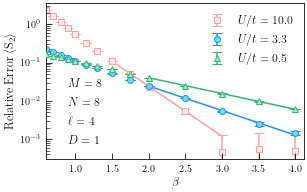

In [60]:
with plt.style.context('../IOP_large.mplstyle'):

    fig,ax1 = plt.subplots()
    ax1.set_yscale("log")


    # U/t=10.0
    ax1.errorbar(betas,S2_MOTT_relErr, yerr=S2_MOTT_relErr_err, fmt='.', capsize=5,
                label=r'$U/t=10.0$',color=colors[0],mfc=colors_light[0],marker='s',zorder=1)
    # U/t=3.3
    ax1.errorbar(betas,S2_PT_relErr, yerr=S2_PT_relErr_err, fmt='.', capsize=5,
                label=r'$U/t=3.3$',color=colors[1],mfc=colors_light[1],marker='o',zorder=2)
    # U/t=0.5
    ax1.errorbar(betas,S2_SF_relErr, yerr=S2_SF_relErr_err, fmt='.', capsize=5,
                label=r'$U/t=0.5$',color=colors[2],mfc=colors_light[2],marker='^',zorder=3)
    
    # Perform single exponential fits
    def exponential(x, c1, c2):
        return c1*np.exp(-x*c2)
    

    # U/t=10.0
    popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential,
                                                              betas[7:-2], 
                                                              S2_MOTT_relErr[7:-2],
                                                              sigma=S2_MOTT_relErr_err[7:-2],
                                                              p0=[1,1])
    # Extract fit parameters and their error
    c1,c2 = popt_exponential
    c1_err,c2_err = np.sqrt(np.diag(pcov_exponential))   
    
    print("MOTT exponent:   %.4f +/- %.4f"%(c2,c2_err))
    print("MOTT pre-factor: %.4f +/- %.4f"%(c1,c1_err),"\n")
    betas_fit = np.linspace(betas[7],betas[-3],1000)
    y_fit = c1*np.exp(-betas_fit*c2)
    ax1.plot(betas_fit,y_fit,color=colors[0],zorder=0)

    ax1.set_ylabel(r'$\rm{Relative} \; \rm{Error} \; \langle S_2 \rangle$')
    ax1.set_xlabel(r'$\beta$')
    ax1.axhline(0,color="#888888",zorder=-1)
    ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
    ax1.tick_params(direction='in')
    
    # U/t=3.3
    popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential,
                                                              betas[9:], 
                                                              S2_PT_relErr[9:],
                                                              sigma=S2_PT_relErr_err[9:],
                                                              p0=[1,1])
    
    # Extract fit parameters and their error
    c1,c2 = popt_exponential
    c1_err,c2_err = np.sqrt(np.diag(pcov_exponential)) 
    
    print("PT exponent:     %.4f +/- %.4f"%(c2,c2_err))
    print("PT pre-factor:   %.4f +/- %.4f"%(c1,c1_err),"\n")

    betas_fit = np.linspace(betas[9],4.0,1000)
    y_fit = c1*np.exp(-betas_fit*c2)
    ax1.plot(betas_fit,y_fit,color=colors[1],zorder=0)

    ax1.set_ylabel(r'$\rm{Relative} \; \rm{Error} \; \langle S_2 \rangle$')
    ax1.set_xlabel(r'$\beta$')
    ax1.axhline(0,color="#888888",zorder=-1)
    ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
    ax1.tick_params(direction='in')
    
    # U/t=0.5
    popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential,
                                                              betas[9:], 
                                                              S2_SF_relErr[9:],
                                                              sigma=S2_SF_relErr_err[9:],
                                                              p0=[1,1])
    
    # Extract fit parameters and their error
    c1,c2 = popt_exponential
    c1_err,c2_err = np.sqrt(np.diag(pcov_exponential))   
    
    print("SF exponent:     %.4f +/- %.4f"%(c2,c2_err))
    print("SF pre-factor:   %.4f +/- %.4f"%(c1,c1_err),"\n")

    betas_fit = np.linspace(betas[9],4.0,1000)
    y_fit = c1*np.exp(-betas_fit*c2)
    ax1.plot(betas_fit,y_fit,color=colors[2],zorder=0)

    ax1.set_ylabel(r'$\rm{Relative} \; \rm{Error} \; \langle S_2 \rangle$')
    ax1.set_xlabel(r'$\beta$')
    ax1.axhline(0,color="#888888",zorder=-1)
    ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
    ax1.tick_params(direction='in')

    # Set plot limits
    ax1.set_xlim(np.min(betas)*0.99,np.max(betas)*1.03)

    # Annotate system information
    ax1.annotate(r"$M=8$",(0.22,0.60-.05),
                xycoords='figure fraction')
    ax1.annotate(r"$N=8$",(0.22,0.60-.15),
                xycoords='figure fraction')
    ax1.annotate(r"$\ell=4$",(0.22,0.60-.25),
                xycoords='figure fraction')
    ax1.annotate(r"$D=1$",(0.22,0.60-.35),
                xycoords='figure fraction')
    
    # Set tick parameters
    ax1.tick_params(direction='in',which='both')

    # Set legend
    plt.legend(frameon=False)

    # Save figure
    plt.savefig("/Users/ecasiano/Desktop/papers-latticepigs/Figures/relativeErrorsS2_N8.pdf",dpi=400)
    plt.savefig("relativeErrorsS2_N8.png",dpi=400)
    plt.show()

In [6]:
betas[9]

2.0